In [1]:
!ls

1990_female.csv 1994_male.csv   2000_female.csv 2004_male.csv   Untitled.ipynb
1990_male.csv   1996_female.csv 2000_male.csv   2006_female.csv
1992_female.csv 1996_male.csv   2002_female.csv 2006_male.csv
1992_male.csv   1998_female.csv 2002_male.csv   2008_female.csv
1994_female.csv 1998_male.csv   2004_female.csv 2008_male.csv


## When to use for-loops
How can you combine all of the csv data in this folder?
Let's _glob_ em.

In [7]:
import glob


# print first 5 files that are csv files
glob.glob('*.csv')[:5]

['1998_male.csv',
 '1992_male.csv',
 '1996_female.csv',
 '2002_female.csv',
 '2004_male.csv']

In [23]:
# Regular Expressions..
import re

# compile your pattern. VERBOSE let's you add comments in the expression!
pattern = re.compile("""

  (?P<year>\d+)_         # first n digits, stop at '_'
  (?P<gender>.*?)\.      # all characters, stop at '.'
  
""", re.VERBOSE)

# test the pattern on one string..
m = pattern.search('1998_male.csv')
m.groupdict()

{'year': '1998', 'gender': 'male'}

In [18]:
from collections import defaultdict


# set up initial data collection.
values = defaultdict(list)

# iterate over all csv files
for filename in glob.glob('*.csv'):
    
    # get the year and gender from the file name
    m = pattern.search(filename)
    year, gender = m.groups()
    
    # open the file
    with open(filename) as f:
        for row in f.read().splitlines():
            
            # get the rank and name from the row
            rank, name = row.split(',')
            
            # add all values to the data collection
            values['year'].append(year)
            values['rank'].append(rank)
            values['gender'].append(gender)
            values['name'].append(name)

In [21]:
import pandas as pd

# bata-bing, bata-boom
babynames = pd.DataFrame(data=values)
babynames

,year,rank,gender,name
0,1998,1,male,Michael
1,1998,2,male,Jacob
2,1998,3,male,Matthew
3,1998,4,male,Joshua
4,1998,5,male,Christopher
...,...,...,...,...
19995,2004,996,female,Darlene
19996,2004,997,female,Estefania
19997,2004,998,female,Heidy
19998,2004,999,female,Miya


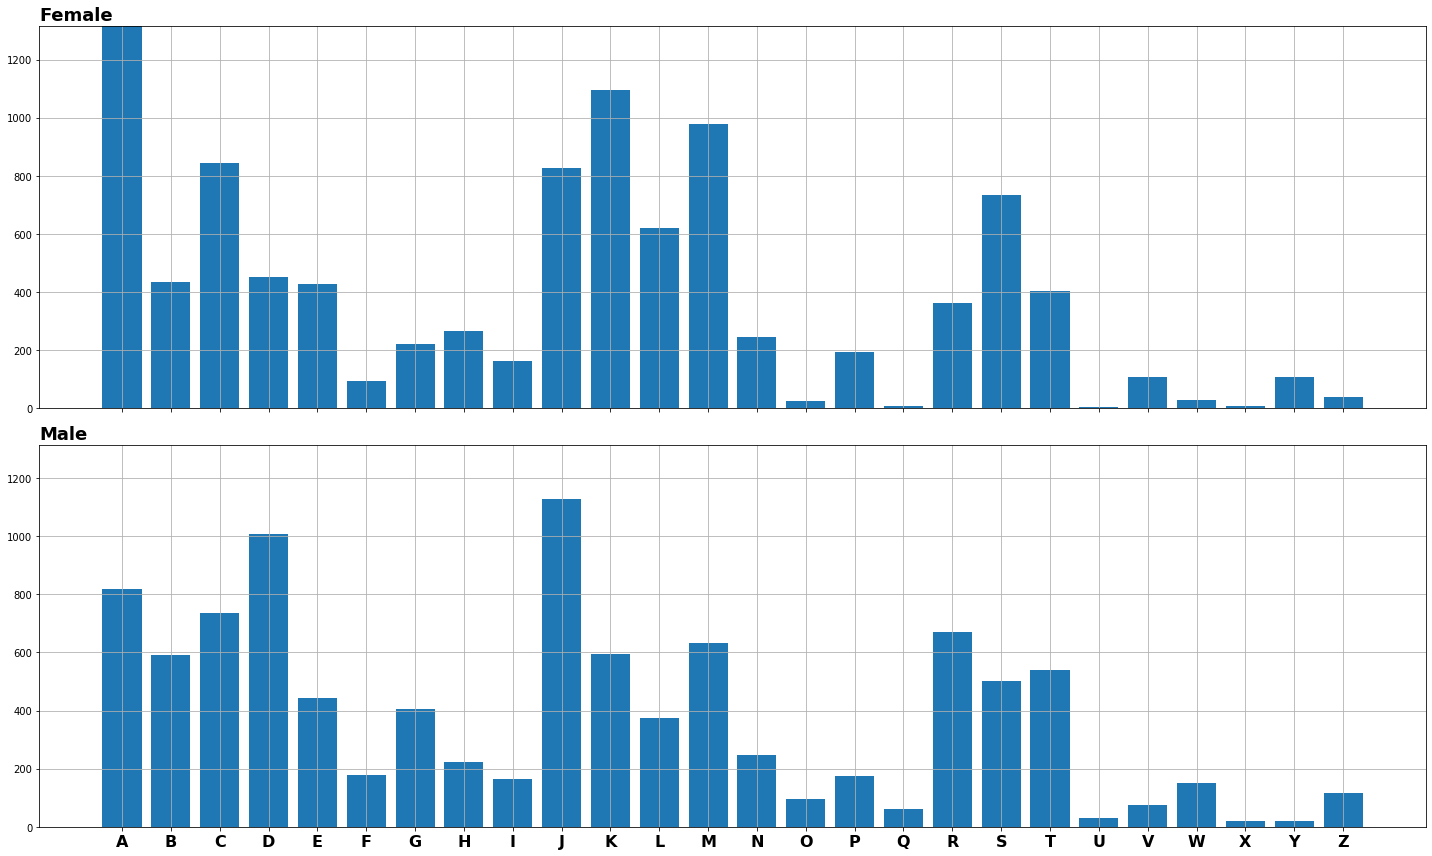

In [45]:
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

# set up initial figure definitions
f, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# keep track of counts so I can reference them later
max_count = []

# iterate over genders
for ind, (gender, df) in enumerate(babynames.groupby('gender')):
    
    # lowercase
    uppercase_first_char = df['name'].str.upper().str[0]
    char_counts = Counter(uppercase_first_char)
    
    max_count.append(max(char_counts.values()))
    
    sorted_chars = sorted(char_counts)
    
    axes[ind].grid()
        
    axes[ind].set_title(gender.capitalize(), loc='left', fontdict={'fontsize': 18, 'fontweight': 'bold'})
    
    axes[ind].bar(range(len(sorted_chars)), [char_counts[char] for char in sorted_chars], align='center')
    axes[ind].set_xticks(range(len(sorted_chars)))
    axes[ind].set_xticklabels(
        sorted_chars, 
        fontdict={'fontsize': 16, 'fontweight': 'bold'}
    )
    
for ax in axes:
    ax.set_ylim(0, max(max_count))
    
plt.tight_layout()
plt.show();